In [1]:
import os 
import numpy as np
import cv2


def show(img):
    cv2.imshow('img image',img.astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    
def show_sequence(sequence):
    for i in range(len(sequence)):
        show(sequence[i])
    
    
data_dir = '/home/dato/src/my_projects/robotics/inverse_kinematics_xarm/saved_data/2023-11-25'


In [98]:
filenames = set([x.replace('actions_', '').replace('frames_', '').replace('.npy', '').replace('states_', '') for x in os.listdir(data_dir)])

filenames

{'17009495958617907'}

In [105]:
for filename in filenames:
    action_loaded = np.load(os.path.join(data_dir, 'actions_' + filename + '.npy'))
    frames_loaded = np.load(os.path.join(data_dir, 'frames_' + filename + '.npy'))
    break

In [106]:
print(frames_loaded.shape)
print(action_loaded.shape)

(49, 240, 320, 3)
(49, 4)


In [108]:
for i in range(action_loaded.shape[0]):
    print(action_loaded[i])
    show(frames_loaded[i])

[-5.91160736e-03 -2.81753345e-06 -2.78771285e-02  1.00000000e+00]
[-5.32829229e-03  4.61502516e-06 -3.46844683e-02  1.00000000e+00]
[-5.70159947e-03  2.86503691e-06 -3.46949576e-02  1.00000000e+00]
[ 1.63960716e-03  3.56312796e-05 -3.57570027e-02  1.00000000e+00]
[-1.07382474e-02 -2.47713538e-05 -2.97366389e-02  1.00000000e+00]
[ 2.80199336e-03  6.07425654e-04  2.50615011e-02 -1.00000000e+00]
[ 4.03260924e-03 -6.15527930e-04  2.43265431e-02 -1.00000000e+00]
[ 5.49246025e-03  6.59416866e-06  2.20984709e-02 -1.00000000e+00]
[ 3.82705542e-03  6.03381086e-07  2.00830127e-02 -1.00000000e+00]
[ 3.27227738e-03  5.39851312e-04  1.98645522e-02 -1.00000000e+00]
[ 3.47416730e-03 -5.43102561e-04  2.11085388e-02 -1.00000000e+00]
[ 4.30068562e-04 -1.86027349e-05  2.46996744e-02 -1.00000000e+00]
[ 8.40655938e-03 -2.73688534e-02  1.93854123e-04 -1.00000000e+00]
[ 0.00935727 -0.02719597 -0.00468827 -1.        ]
[ 0.00874818 -0.02716272 -0.00299391 -1.        ]
[ 0.01090626 -0.02384612 -0.00524351 -1.  

In [4]:
3096

3096

In [5]:
3102

3102

In [ ]:
relocate-v0: 3102
xarm: 3072
    

In [7]:
t=0.2

for x in np.arange(0, 1+t, t):
    print(x)

0.0
0.2
0.4
0.6000000000000001
0.8
1.0


In [9]:
t=0.2

for x in np.arange(0, 1, t):
    print(x)

0.0
0.2
0.4
0.6000000000000001
0.8


In [46]:
import math

class ParabolicController:
    def __init__(self, current_location, p1, p2, h=0.2, t=0.07):
        # 1 ღიაა
        # -1 დახურულია

        self.current_location = current_location
        self.p1 = p1
        self.p2 = p2
        assert p1[-1]==p2[-1]
        self.Z_coordinate = p1[-1]
        self.h = h
        self.t = t
        self.sequence, self.gripper = self.get_sequence()
        print(self.sequence)
        self.total_len = 1/self.t
        self.chasing_idx = 0
        self.gripper_open = 1

    def get_sequence(self):
        stop_height = 0.1
        sequence = []
        gripper = []
        for x in np.arange(0, 1, self.t):
            sequence.append(self.cl_pt_linear(self.current_location, self.p1, x))
            if x + self.t * 1.5 >= 1:
                break
            gripper.append(1)
        
        for x in np.arange(0, 1+self.t, self.t):
            sequence.append(self.cl_pt(self.p1, self.p2, x))
            if x >= 1:
                gripper.append(1)
            else:
                gripper.append(-1)

        root = (1 + math.sqrt(1-stop_height/self.h)) / 2
        for x in np.arange(self.t, 1+self.t, self.t):
            sequence.append(self.cl_pt(self.p2, self.p1, x))
            gripper.append(1)
            if x >= root:
                break
        return sequence, gripper
    
    def cl_pt_linear(self, p1, p2, t):
        x_t = p1[0] + (p2[0]-p1[0])*t
        y_t = p1[1] + (p2[1]-p1[1])*t
        z_t = p1[2] + (p2[2]-p1[2])*t
        return [x_t, y_t, z_t]

    def cl_pt(self, p1, p2, t):
        x_t = p1[0] + (p2[0]-p1[0])*t
        y_t = p1[1] + (p2[1]-p1[1])*t
        z_t = 4*self.h*t*(1-t) + self.Z_coordinate 
        return [x_t, y_t, z_t]
    
    
loc = [-0.2154, -0.0028, 0.0701]
controller = ParabolicController(loc, [-0.13, 0.08, 0.06], [-0.13, -0.15, 0.06]) 





[[-0.2154, -0.0028, 0.0701], [-0.209422, 0.002996000000000001, 0.069393], [-0.203444, 0.008792000000000001, 0.068686], [-0.197466, 0.014588, 0.067979], [-0.191488, 0.020384000000000003, 0.067272], [-0.18551, 0.026180000000000002, 0.066565], [-0.179532, 0.031976000000000004, 0.065858], [-0.17355399999999999, 0.03777200000000001, 0.065151], [-0.167576, 0.04356800000000001, 0.064444], [-0.161598, 0.04936400000000001, 0.063737], [-0.15562, 0.05516000000000001, 0.06303], [-0.149642, 0.06095600000000001, 0.062322999999999996], [-0.14366400000000001, 0.066752, 0.061616], [-0.13768599999999998, 0.07254800000000002, 0.060909], [-0.13, 0.08, 0.06], [-0.13, 0.0639, 0.11208], [-0.13, 0.0478, 0.15632000000000001], [-0.13, 0.0317, 0.19272000000000003], [-0.13, 0.015600000000000003, 0.22128], [-0.13, -0.0005000000000000004, 0.242], [-0.13, -0.016600000000000004, 0.25488], [-0.13, -0.03270000000000001, 0.25992000000000004], [-0.13, -0.048799999999999996, 0.25712], [-0.13, -0.06490000000000003, 0.24647

In [47]:
sequence = []
gripper = []


# for x in np.arange(0, 1, controller.t):
#     sequence.append(controller.cl_pt_linear(controller.current_location, controller.p1, x))
#     if x + controller.t * 1.5 >= 1:
#         break
#     gripper.append(1)

# print(sequence)
# print('=============')

sequence = []
for x in np.arange(0, 1+controller.t, controller.t):
    print(controller.cl_pt(controller.p1, controller.p2, x), x)
    sequence.append(controller.cl_pt(controller.p1, controller.p2, x))
    if x >= 1:
        gripper.append(1)
    else:
        gripper.append(-1)
    
    

[-0.13, 0.08, 0.06] 0.0
[-0.13, 0.0639, 0.11208] 0.07
[-0.13, 0.0478, 0.15632000000000001] 0.14
[-0.13, 0.0317, 0.19272000000000003] 0.21000000000000002
[-0.13, 0.015600000000000003, 0.22128] 0.28
[-0.13, -0.0005000000000000004, 0.242] 0.35000000000000003
[-0.13, -0.016600000000000004, 0.25488] 0.42000000000000004
[-0.13, -0.03270000000000001, 0.25992000000000004] 0.49000000000000005
[-0.13, -0.048799999999999996, 0.25712] 0.56
[-0.13, -0.06490000000000003, 0.24647999999999998] 0.6300000000000001
[-0.13, -0.081, 0.22799999999999998] 0.7000000000000001
[-0.13, -0.09709999999999998, 0.20168] 0.77
[-0.13, -0.11320000000000001, 0.16751999999999997] 0.8400000000000001
[-0.13, -0.12930000000000003, 0.1255199999999999] 0.9100000000000001
[-0.13, -0.14540000000000003, 0.07567999999999993] 0.9800000000000001
[-0.13, -0.16149999999999998, 0.017999999999999954] 1.05


In [37]:
controller.p1

[-0.13, 0.08, 0.06]

In [38]:
controller.p2

[-0.13, -0.15, 0.06]

In [44]:
def cl_pt(p1, p2, t):
    x_t = p1[0] + (p2[0]-p1[0])*t
    y_t = p1[1] + (p2[1]-p1[1])*t
    z_t = 4*controller.h*t*(1-t)
    print(z_t)
    return [x_t, y_t, z_t]

cl_pt(controller.p1, controller.p2, 0)

0.0


[-0.13, 0.08, 0.0]

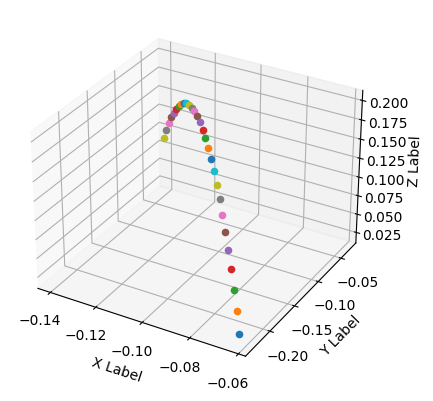

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in points:
    ax.scatter(point[0], point[1], point[2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
